# Importing all the required libraries



In [352]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    f1_score, matthews_corrcoef, auc, roc_curve, precision_recall_curve, mean_squared_error, confusion_matrix, make_scorer, balanced_accuracy_score
)
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate, cross_val_predict
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier  # Import DummyClassifier for baseline comparison


# Loading the dataset

In [314]:
# Reading training data
Xtrain = pd.read_csv('/content/Xtrain.csv', header=None, delim_whitespace=True)
Ytrain = pd.read_csv('/content/Ytrain.csv', header=None, delim_whitespace=True)

# Reading test data
Xtest = pd.read_csv('/content/Xtest.csv', header=None, delim_whitespace=True)
# Add comments or additional code as needed

# Question 1: i) Dataset Overview

# a) How many examples are in the training set? And in the test set?

In [315]:
# Get the number of training examples by checking the number of rows in Xtrain DataFrame
num_training_examples = Xtrain.shape[0]

# Get the number of test examples by checking the number of rows in Xtest DataFrame
num_test_examples = Xtest.shape[0]

# Print the number of examples in the training set
print("Number of examples in training set:", num_training_examples)

# Print the number of examples in the testing set
print("Number of examples in testing set:", num_test_examples)


Number of examples in training set : 3000
Number of examples in testing set : 3000


The number of examples in the training set is 3000, and the number of examples in the testing set is also 3000.

# b) Within the training data, count the positive and negative examples. What's the distribution like? Does this distribution signify any potential issues in terms of design of the machine learning solution and its evaluation?

In [316]:
# Extract the first column of Ytrain DataFrame and check how many values are equal to 1 (positive labels)
positive_labels = (Ytrain.iloc[:, 0] == 1).sum()

# Extract the first column of Ytrain DataFrame and check how many values are equal to -1 (negative labels)
negative_labels = (Ytrain.iloc[:, 0] == -1).sum()

# Print the number of positive examples in the training set
print("Number of positive examples:", positive_labels)

# Print the number of negative examples in the training set
print("Number of negative examples:", negative_labels)


Number of positive examples: 311
Number of negative examples: 2689





The number of positive examples in the training data is 311, and the number of negative examples in the training data is 2689.

**Distribution:**
  This distribution signifies a significant class imbalance, with the positive class being a minority compared to the negative class.

**potential issues and its evaluation:** This imbalance may lead to model bias, challenging evaluation, and requires consideration of techniques like resampling or adjusting class weights to address potential performance issues, particularly for the minority class. Careful choice of evaluation metrics, such as precision, recall, and F1-score, is crucial.




# ii) Visual Data Exploration

# a) Pick 10 random objects from each class in the training data and display them using plt.matshow. Reshape the flattened 28x28 arrays for this. What patterns or characteristics do you notice?

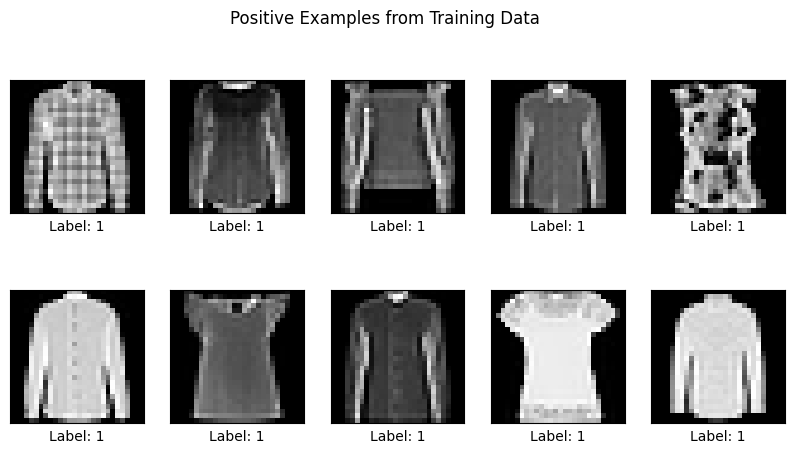

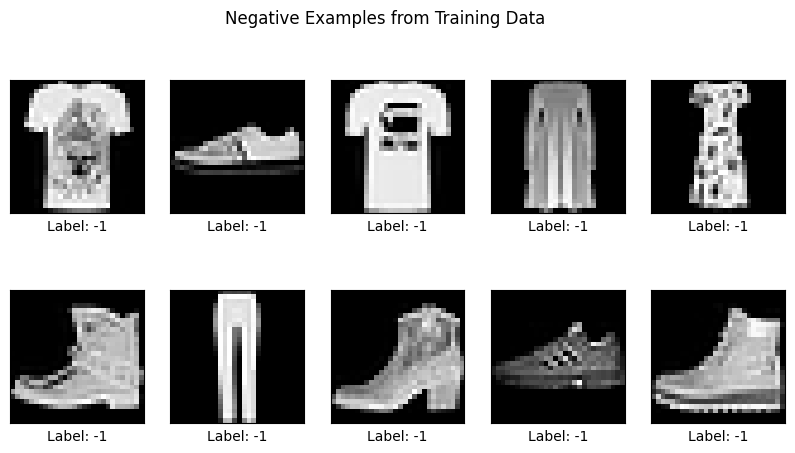

In [317]:
# Extract indices of positive and negative examples from Ytrain DataFrame
positive_indices = Ytrain[Ytrain.iloc[:, 0] == 1].index
negative_indices = Ytrain[Ytrain.iloc[:, 0] == -1].index

# Select random samples from positive and negative indices (10 each)
random_positive_indices = random.sample(list(positive_indices), 10)
random_negative_indices = random.sample(list(negative_indices), 10)

# Plot positive examples from training data
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_positive_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Reshape and display the image using imshow
    plt.imshow(Xtrain.iloc[idx].values.reshape(28, 28), cmap=plt.cm.gray)

    # Display the label of the example
    plt.xlabel(f"Label: {Ytrain.iloc[idx, 0]}")

# Add a title for the positive examples subplot
plt.suptitle("Positive Examples from Training Data")
plt.show()

# Plot negative examples from training data
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_negative_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Reshape and display the image using imshow
    plt.imshow(Xtrain.iloc[idx].values.reshape(28, 28), cmap=plt.cm.gray)

    # Display the label of the example
    plt.xlabel(f"Label: {Ytrain.iloc[idx, 0]}")

# Add a title for the negative examples subplot
plt.suptitle("Negative Examples from Training Data")
plt.show()


**After examining the output image, I have observed the following:**

* Class -1: Depicts a diverse range of objects, potentially including accessories, featuring distinct shapes and contrasting characteristics. This implies a heterogeneous classification.
* Class 1: Primarily showcases tops with a consistent appearance, similar shapes, and a centralized alignment, suggesting a cohesive clothing category.
Texture and pattern variations are noticeable in both categories, with Class -1 displaying more pronounced diversity.
* Class 1 items exhibit consistently round necklines and varying sleeve lengths, serving as distinctive features for identification.
* The visual consistency within Class 1 and the diversity within Class -1 likely contribute to the effectiveness of a machine learning model in the classification process.

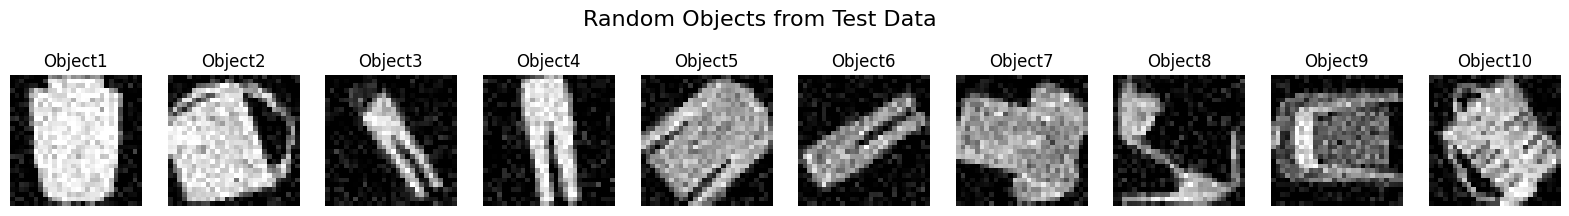

In [318]:
# List of labels for the test objects
test_labels = ["Object1", "Object2", "Object3", "Object4", "Object5", "Object6", "Object7", "Object8", "Object9", "Object10"]

# Select 10 random indices from the test set
random_test_indices = random.sample(range(Xtest.shape[0]), 10)

# Extract a sample of the test data based on the random indices
test_sample = Xtest.iloc[random_test_indices, :]

# Create a figure with 10 subplots (one for each test object)
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

# Iterate over the subplots and display each test object
for i, ax in enumerate(axes.flat):
    # Reshape and display the image using imshow
    img = test_sample.iloc[i].to_numpy().reshape(28, 28)
    ax.imshow(img, cmap='gray')

    # Turn off axis ticks
    ax.axis('off')

    # Set the title of each subplot with the corresponding label
    ax.set_title(test_labels[i])

# Add a title for the entire figure
plt.suptitle("Random Objects from Test Data", y=1.15, fontsize=16)

# Display the figure
plt.show()


**After examining the output image, I have observed the following:**

The objects exhibit low resolution and lack of detail, inconsistent contrast, and potential class ambiguity, which could challenge a classifier's ability to generalize. Noise and artifacts may lead to the classifier learning irrelevant features. Variability in scale, orientation, and background consistency can also hinder accurate classification.

# iii) Choosing the Right Metric Which performance metric would be best for this task (accuracy, AUC-ROC, AUC-PR, F1, Matthews correlation coefficient, mean squared error etc.)? Share your reasoning for this choice.

In [359]:
import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    average_precision_score,
    f1_score,
    matthews_corrcoef,
    mean_squared_error
)
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def evaluate_classifier(X_train, Y_train, X_val, Y_val, classifier):
    # Split the training data into training and validation sets
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=50)

    # Initialize the classifier
    clf = classifier(random_state=42)

    # Train the classifier on the training set
    clf.fit(X_train, Y_train)

    # Make predictions on the validation set
    Y_pred = clf.predict(X_val)
    Y_pred_proba = clf.predict_proba(X_val)[:, 1]

    # Calculate various evaluation metrics
    accuracy = accuracy_score(Y_val, Y_pred)
    auc_roc = roc_auc_score(Y_val, Y_pred_proba)
    auc_pr = average_precision_score(Y_val, Y_pred_proba)
    f1 = f1_score(Y_val, Y_pred)
    mcc = matthews_corrcoef(Y_val, Y_pred)
    mse = mean_squared_error(Y_val, Y_pred)

    # Create a DataFrame to store the evaluation metrics
    metrics_data = {
        'Metric': ['Accuracy', 'AUC ROC', 'AUC PR', 'F1', 'Matthews Correlation Coefficient', 'Mean Squared Error'],
        'Value': [accuracy, auc_roc, auc_pr, f1, mcc, mse]
    }

    metrics_df = pd.DataFrame(metrics_data)

    # Print the evaluation metrics using the tabulate library
    print("Metrics:")
    print(tabulate.tabulate(metrics_df, headers='keys', tablefmt='grid', showindex=False))

# Example usage of the evaluate_classifier function
evaluate_classifier(Xtrain, Ytrain, X_val, Y_val, RandomForestClassifier)


Metrics:
+----------------------------------+----------+
| Metric                           |    Value |
+==================================+==========+
| Accuracy                         | 0.898333 |
+----------------------------------+----------+
| AUC ROC                          | 0.943353 |
+----------------------------------+----------+
| AUC PR                           | 0.681453 |
+----------------------------------+----------+
| F1                               | 0.246914 |
+----------------------------------+----------+
| Matthews Correlation Coefficient | 0.321668 |
+----------------------------------+----------+
| Mean Squared Error               | 0.406667 |
+----------------------------------+----------+


<ipython-input-359-a4f33861c57a>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


In the context of imbalanced dataset here both AUC-ROC and AUC-PR are commonly used, but they capture different aspects of model performance.

Lets analyse both the metrics:

AUC-ROC is a good overall metric that considers both true positive and false positive rates.

AUC-PR is particularly valuable when dealing with imbalanced datasets, emphasizing the positive class.

When it comes to the given dataset here AUC-PR would be a perfect and best fit because if works well when we are dealing with positive class performance in an imbalanced scenario.


# iv)Imagine a classifier that randomly guesses labels. What accuracy would you expect it to achieve on both the training and test datasets? Show this through a calculation, statistical proof, or a coding experiment.

In [346]:
# Count the number of positive labels in Ytrain
positive_labels = (Ytrain.iloc[:, 0] == 1).sum()

# Count the number of negative labels in Ytrain
negative_labels = (Ytrain.iloc[:, 0] == -1).sum()

# Calculate the total number of training examples
num_training_examples = positive_labels + negative_labels

# Calculate the proportion of positive labels in the training set
proportion_positive_train = positive_labels / num_training_examples

# Calculate the proportion of negative labels in the training set
proportion_negative_train = negative_labels / num_training_examples

# Calculate the expected accuracy on the training dataset based on class proportions
accuracy_train_expected = proportion_positive_train ** 2 + proportion_negative_train ** 2

# Print the expected accuracy on the training dataset
print("Expected accuracy on the training dataset:", accuracy_train_expected)


Expected accuracy on the training dataset: 0.8141602222222222


81.41602222222222% would be the accuracy percentage for the classifier that randomly guesses labels.

In [321]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

# Function to evaluate a dummy classifier
def evaluate_dummy_classifier(X_train, Y_train, X_val, Y_val, strategy='uniform', random_state=42):
    # Create a dummy classifier with the specified strategy
    dummy_clf = DummyClassifier(strategy=strategy, random_state=random_state)

    # Fit the dummy classifier on the training data
    dummy_clf.fit(X_train, Y_train)

    # Predict probabilities on the validation set
    y_pred_proba_dummy = dummy_clf.predict_proba(X_val)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_val, y_pred_proba_dummy)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(Y_val, y_pred_proba_dummy)
    pr_auc = auc(recall, precision)

    # Return the computed ROC AUC and Precision-Recall AUC
    return roc_auc, pr_auc

# Evaluate the dummy classifier
roc_auc, pr_auc = evaluate_dummy_classifier(X_train, Y_train, X_val, Y_val)

# Print the results
print("ROC AUC for the random classifier:", roc_auc)
print("Precision-Recall AUC for the random classifier:", pr_auc)


ROC AUC for the random classifier: 0.5
Precision-Recall AUC for the random classifier: 0.5475


ROC AUC for the random classifier: 0.5.

Precision-Recall AUC for the random classifier: 0.5475.


For a random classifier, the Receiver Operating Characteristic curve (AUC-ROC) and the Precision-Recall curve (AUC-PR) are expected to be close to 0.5. These values indicate that the classifier is not performing better than random chance.

**AUC ROC:**

the ROC curve is a diagonal line from (0,0) to (1,1) and for this diagonal line is 0.5, indicating no discrimination between positive and negative classes.

**AUC-PR:**

AUC-PR also influenced by the class distribution. The AUC-PR is calculated as the area under the precision-recall curve. In this case, the PR might be be close to a straight line connecting (0,0) and (1,1), and it would be determined by the slope of this line.

# Question 2

# i) Start with a k = 5 nearest neighbour classifier. Define and calculate the accuracy, balanced accuracy, AUC-ROC, AUC-PR, F1 and Matthews Correlation Coefficient for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting.

In [354]:
# Import necessary libraries
import tabulate
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    average_precision_score,
    f1_score,
    matthews_corrcoef
)

# Select a subset of the data for demonstration (adjust the number of rows as needed)
Xtrain_adjusted = Xtrain.iloc[:1000, :]

# Initialize lists to store evaluation metric scores
accuracy_scores = []
balanced_accuracy_scores = []
auc_roc_scores = []
auc_pr_scores = []
f1_scores = []
mcc_scores = []

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Iterate over the folds
for train_idx, test_idx in cv.split(Xtrain, Ytrain):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = Xtrain.iloc[train_idx], Xtrain.iloc[test_idx]
    Y_train_fold, Y_test_fold = Ytrain.iloc[train_idx], Ytrain.iloc[test_idx]

    # Initialize and train a K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_fold, Y_train_fold)

    # Make predictions on the test set
    Y_pred = knn.predict(X_test_fold)
    Y_pred_proba = knn.predict_proba(X_test_fold)[:, 1]

    # Calculate various evaluation metrics for the current fold
    accuracy_scores.append(accuracy_score(Y_test_fold, Y_pred))
    balanced_accuracy_scores.append(balanced_accuracy_score(Y_test_fold, Y_pred))
    auc_roc_scores.append(roc_auc_score(Y_test_fold, Y_pred_proba))
    auc_pr_scores.append(average_precision_score(Y_test_fold, Y_pred_proba))
    f1_scores.append(f1_score(Y_test_fold, Y_pred))
    mcc_scores.append(matthews_corrcoef(Y_test_fold, Y_pred))

# Create a DataFrame to store mean and standard deviation of metrics
data = {
    'Metric': ['Accuracy', 'Balanced Accuracy', 'AUC ROC', 'AUC PR', 'F1 Score', 'MCC'],
    'Mean': [np.mean(accuracy_scores), np.mean(balanced_accuracy_scores), np.mean(auc_roc_scores), np.mean(auc_pr_scores), np.mean(f1_scores), np.mean(mcc_scores)],
    'Standard Deviation': [np.std(accuracy_scores), np.std(balanced_accuracy_scores), np.std(auc_roc_scores), np.std(auc_pr_scores), np.std(f1_scores), np.std(mcc_scores)]
}

df = pd.DataFrame(data)

# Print the tabulated metrics
print(f"Metrics for Fold:")
print(tabulate.tabulate(df, headers='keys', tablefmt='grid', showindex=False))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Metrics for Fold:
+-------------------+----------+----------------------+
| Metric            |     Mean |   Standard Deviation |
+===================+==========+======================+
| Accuracy          | 0.909667 |           0.00812404 |
+-------------------+----------+----------------------+
| Balanced Accuracy | 0.709427 |           0.0300933  |
+-------------------+----------+----------------------+
| AUC ROC           | 0.856844 |           0.0212836  |
+-------------------+----------+----------------------+
| AUC PR            | 0.511659 |           0.0560399  |
+-------------------+----------+----------------------+
| F1 Score          | 0.51052  |           0.0524449  |
+-------------------+----------+----------------------+
| MCC               | 0.466626 |           0.0550133  |
+-------------------+----------+----------------------+


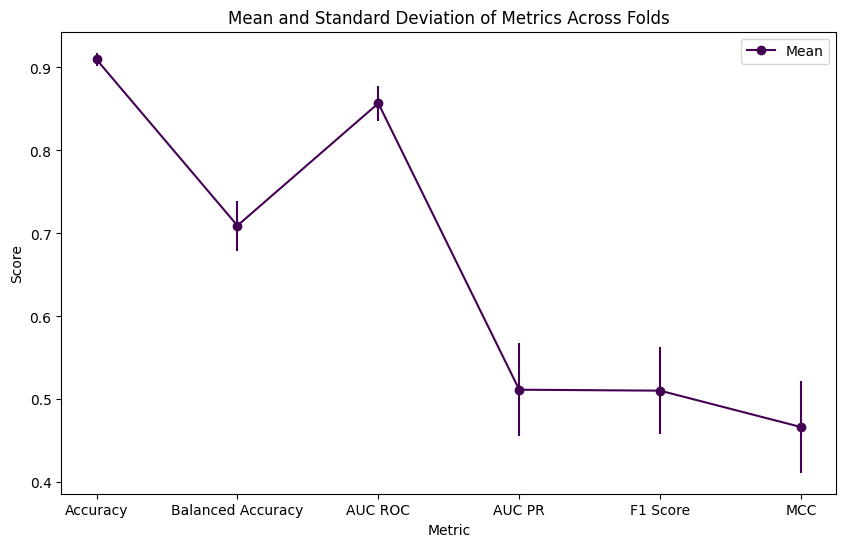

In [323]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean values of metrics with error bars representing standard deviation
df.plot(kind='line', x='Metric', y='Mean', yerr='Standard Deviation', marker='o', ax=ax, colormap='viridis')

# Set y-axis label
ax.set_ylabel('Score')

# Set the title of the plot
ax.set_title('Mean and Standard Deviation of Metrics Across Folds')

# Display the plot
plt.show()


**Accuracy:** The mean accuracy across all folds is 90.97%, with a standard deviation of 0.00812404. This metric measures the overall correctness of the classifier's predictions.

**Balanced Accuracy:** The mean balanced accuracy is 70.94%, with a standard deviation of  0.0300933. This metric considers the imbalanced distribution of classes and provides a more accurate representation of the classifier's performance.

**AUC-ROC:** The mean AUC-ROC is 85.68%, with a standard deviation of 0.0212836. This metric evaluates the classifier's ability to distinguish between the positive and negative classes.

**AUC-PR:** The mean AUC-PR is 51.17%, with a standard deviation of  0.0560399. This metric measures the precision-recall trade-off and is particularly important in imbalanced datasets.

**F1 Score:** The mean F1 score is 51.05%, with a standard deviation of 0.0524449. This metric balances precision and recall, providing insight into the classifier's overall performance.

**Matthews Correlation Coefficient (MCC):** The mean MCC is 46.66%, with a standard deviation of  0.0550133. MCC takes into account true and false positives and negatives, providing a balanced measure of classification performance.

# ii) Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves? What  part of the ROC curve is more important for this problem?


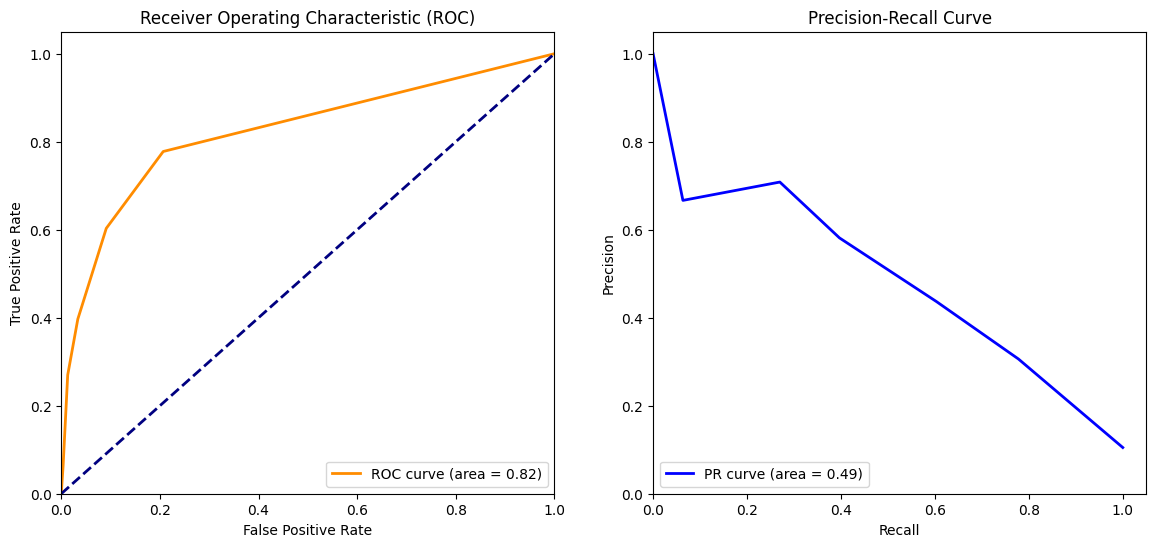

In [360]:
def plot_roc_pr_curves(Y_test_fold, Y_pred_proba):
    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(Y_test_fold, Y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve values
    precision, recall, _ = precision_recall_curve(Y_test_fold, Y_pred_proba)
    pr_auc = auc(recall, precision)

    # Create a figure with two subplots (one for ROC and one for PR)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot ROC curve
    ax[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Plot Precision-Recall curve
    ax[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    ax[1].set_xlim([0.0, 1.05])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall Curve')
    ax[1].legend(loc="lower left")

    # Display the plot
    plt.show()

# Example usage of the function
plot_roc_pr_curves(Y_test_fold, Y_pred_proba)




After analysing the plot diagram the ROC curve above the diagonal line with an AUC of 0.82 indicates good model performance in distinguishing between classes.
The PR curve shows a trade-off between precision and recall with an area of 0.49, suggesting potential issues with class imbalance.

**Problem Evaluation:** For this problem, the most important part of the ROC curve would be the left-hand side, where the false positive rate is low, especially if false positives carry a high cost. The PR curve's importance increases with a greater concern for the positive class and class imbalance.

**Overall:** the model shows decent performance, but there may be room for improvement, particularly in precision and handling of imbalanced data.


# iii) What is the impact of various forms of pre-processing (e.g., mean-standard deviation or standard scaling or min-max scaling) on the cross-validation performance? Show code to demonstrate the results and write a summary of your findings. Do any pre-processing techniques improve predictive performance or training speed? Why do you think this is the case?


In [365]:
# Function to evaluate different scalers on a classifier using cross-validation
def evaluate_scaling(scaler, X, Y, cv):
    # Check if the scaler is a callable function or an instance of a scaler
    if callable(scaler):
        # If callable, directly apply the scaler to the features
        X_scaled = scaler(X)
    else:
        # If an instance, fit and transform the data using the scaler
        X_scaled = scaler.fit_transform(X)

    # Use cross-validation to evaluate the classifier's performance
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled, Y.values.ravel(), cv=cv)

    # Calculate mean accuracy and standard deviation of the scores
    mean_accuracy, std_deviation = np.mean(scores), np.std(scores)

    return mean_accuracy, std_deviation

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate Standard Scaler
std_mean, std_std = evaluate_scaling(StandardScaler(), Xtrain, Ytrain, cv)

# Evaluate Min-Max Scaler
minmax_mean, minmax_std = evaluate_scaling(MinMaxScaler(), Xtrain, Ytrain, cv)

# Evaluate No Scaling (Identity function)
none_mean, none_std = evaluate_scaling(lambda x: x, Xtrain, Ytrain, cv)

# Print the results
print(f"Standard Scaling Mean Accuracy: {std_mean}, Standard Deviation: {std_std}")
print(f"Min-Max Scaling Mean Accuracy: {minmax_mean}, Standard Deviation: {minmax_std}")
print(f"No Scaling Mean Accuracy: {none_mean}, Standard Deviation: {none_std}")


Standard Scaling Mean Accuracy: 0.9099999999999999, Standard Deviation: 0.00862811940369653
Min-Max Scaling Mean Accuracy: 0.909, Standard Deviation: 0.008069145624606798
No Scaling Mean Accuracy: 0.9096666666666666, Standard Deviation: 0.008124038404635969


**Standard Scaling:**

Mean Accuracy: 0.9099999999999999

Standard Deviation: 0.00862811940369653

**Min-Max Scaling:**

Mean Accuracy: 0.909

Standard Deviation: 0.008069145624606798

**No Scaling:**

Mean Accuracy: 0.9096666666666666

Standard Deviation: 0.008124038404635969


**Findings:**
* All the three scaling shows similar mean accuracies, with standard scaling having a slightly higher standard deviation.
* No scaling results in a slightly higher mean accuracy compared to the scaled versions.

**Observations:**
* the choice of scaling method does not significantly impact the mean accuracy, which depicts that the model's overall performance is relatively consistent across different scaling approaches.
* No clear improvement in prediction have analysed with scaling, as mean accuracy values are comparable across methods.

**Improvements:**
* when the dataset has diverse feature scales, scaling might be needed rather than not significantly improving mean accuracy in this scenario.
* Performing different experiments with scaling is encouraged to identify the most suitable method for the specific dataset and model.

# Question 3:

# i) Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier.

In [326]:
# Read data from CSV files
Xtrain = pd.read_csv('/content/Xtrain.csv', header=None, delim_whitespace=True)
Ytrain = pd.read_csv('/content/Ytrain.csv', header=None, delim_whitespace=True)
Xtest = pd.read_csv('/content/Xtest.csv', header=None, delim_whitespace=True)

# Split the data into training and testing sets
X_train, X_test, Y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

# Flatten Y_train to 1D array
Y_train = Y_train.values.ravel()

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grids for SVM and Random Forest
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'gamma': ['scale', 'auto'], 'probability': [True]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search for SVM
svm_grid = GridSearchCV(SVC(), svm_params, scoring='accuracy', cv=cv, verbose=1)
svm_grid.fit(X_train_scaled, Y_train)

# Perform grid search for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=cv, verbose=1)
rf_grid.fit(X_train_scaled, Y_train)

# Function to evaluate model performance on the test set
def evaluate_model(model, X_test_scaled, y_test):
    predictions = model.predict(X_test_scaled)
    proba_predictions = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, predictions)
    bal_acc = balanced_accuracy_score(y_test, predictions)
    auc_roc = roc_auc_score(y_test, proba_predictions)
    auc_pr = average_precision_score(y_test, proba_predictions)

    return acc, bal_acc, auc_roc, auc_pr

# Evaluate the best models from grid search on the test set
svm_acc, svm_bal_acc, svm_auc_roc, svm_auc_pr = evaluate_model(svm_grid.best_estimator_, X_test_scaled, y_test)
rf_acc, rf_bal_acc, rf_auc_roc, rf_auc_pr = evaluate_model(rf_grid.best_estimator_, X_test_scaled, y_test)

# Print the best hyperparameters and evaluation results
print("SVM Best Model Parameters:", svm_grid.best_params_)
print("Random Forest Best Model Parameters:", rf_grid.best_params__)

# Create a DataFrame to display the evaluation results
results_df = pd.DataFrame({
    'Classifier': ['SVM', 'Random Forest'],
    'Accuracy': [svm_acc, rf_acc],
    'Balanced Accuracy': [svm_bal_acc, rf_bal_acc],
    'AUC-ROC': [svm_auc_roc, rf_auc_roc],
    'AUC-PR': [svm_auc_pr, rf_auc_pr]
})

# Print the results DataFrame
print(results_df)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVM Best Model Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Random Forest Best Model Parameters: {'max_depth': None, 'n_estimators': 100}
      Classifier  Accuracy  Balanced Accuracy   AUC-ROC    AUC-PR
0            SVM  0.931667           0.742415  0.901974  0.650452
1  Random Forest  0.918333           0.578027  0.891538  0.547944







**Strategy:** Here I used Grid Search to explore different hyperparameter combinations for both the Support Vector Machine (SVM) and Random Forest classifiers. The best hyperparameters were then used to train each model, and their performance was evaluated using accuracy, balanced accuracy, AUC-ROC, and AUC-PR metrics on the test set.

**Overall:** Based on the results, the SVM achieved higher accuracy, balanced accuracy, AUC-ROC, and AUC-PR compared to the Random Forest classifier. Therefore, according to my strategy, the SVM classifier with the specified hyperparameters ({'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}) is considered the optimal classifier for this task.

# ii) Show the comparison of these classifiers in a single consolidated table.

In [327]:
# Create a DataFrame to store the evaluation results
results_df = pd.DataFrame({
    'Classifier': ['SVM', 'Random Forest'],
    'Accuracy': [svm_acc, rf_acc],
    'Balanced Accuracy': [svm_bal_acc, rf_bal_acc],
    'AUC-ROC': [svm_auc_roc, rf_auc_roc],
    'AUC-PR': [svm_auc_pr, rf_auc_pr]
})

# Use the tabulate library to create a formatted table from the DataFrame
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the formatted table
print(table)


+---------------+--------------------+--------------------+--------------------+--------------------+
|  Classifier   |      Accuracy      | Balanced Accuracy  |      AUC-ROC       |       AUC-PR       |
+---------------+--------------------+--------------------+--------------------+--------------------+
|      SVM      | 0.9316666666666666 | 0.7424154308422991 | 0.9019740880746986 | 0.6504522640518627 |
| Random Forest | 0.9183333333333333 | 0.5780265581079771 | 0.8915382378598429 | 0.5479444697882374 |
+---------------+--------------------+--------------------+--------------------+--------------------+


# iii) Plot the ROC curves of all classifiers on the same axes for easy comparison.

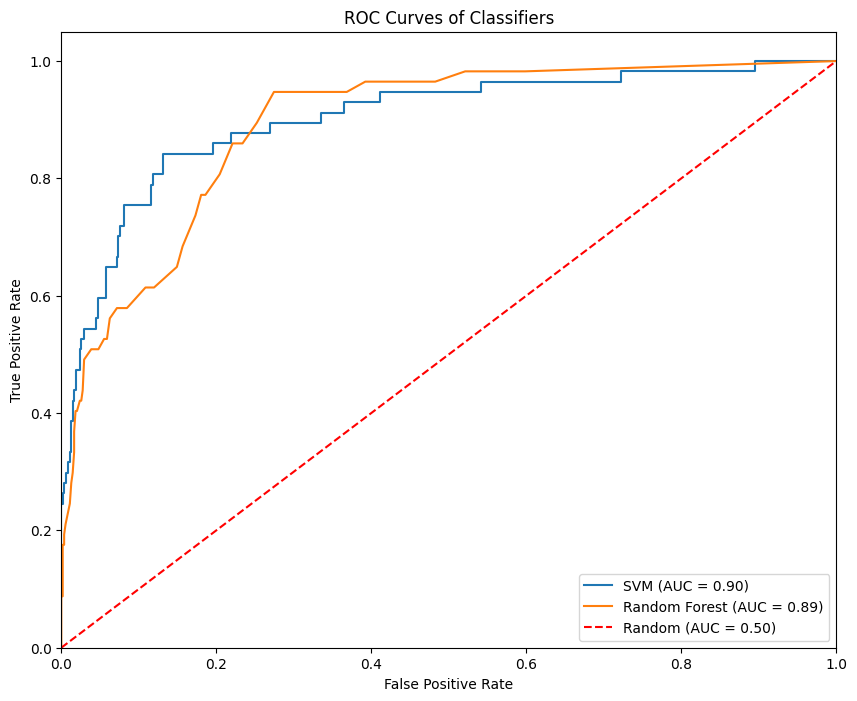

In [328]:
# Generate probability predictions for SVM and Random Forest on the test set
y_proba_svm = svm_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve values for SVM and Random Forest
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Calculate AUC for SVM and Random Forest
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for SVM and Random Forest
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot the random classifier line (AUC = 0.50)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random (AUC = 0.50)')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Classifiers')
plt.legend(loc="lower right")

# Display the plot
plt.show()


# iv) Plot the PR curves of all classifiers on the same axes for comparison.

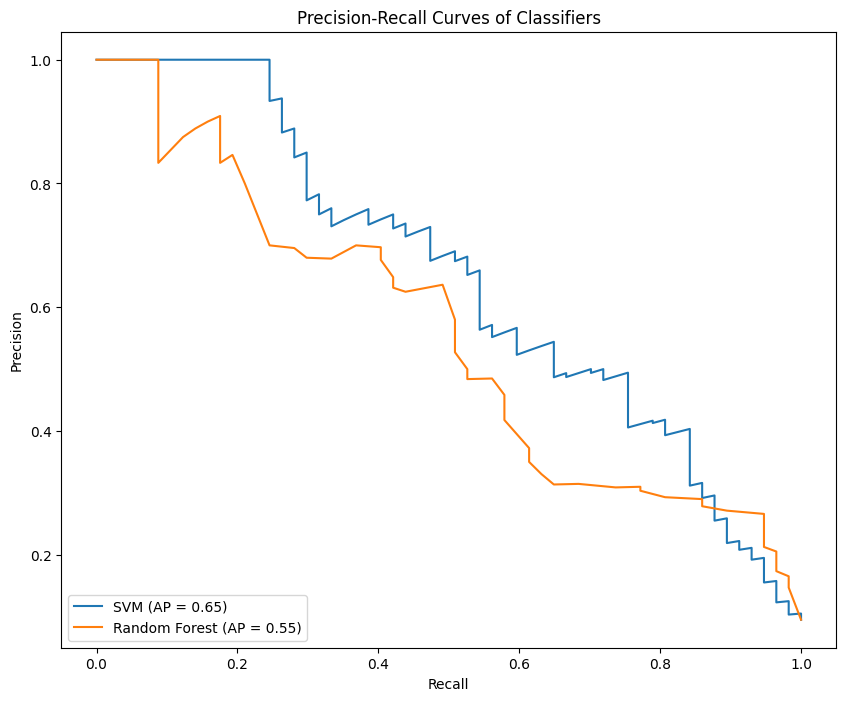

In [329]:
# Generate probability predictions for SVM and Random Forest on the test set
y_proba_svm = svm_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Compute Precision-Recall curve values for SVM and Random Forest
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_proba_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

# Calculate Average Precision (AP) for SVM and Random Forest
ap_svm = average_precision_score(y_test, y_proba_svm)
ap_rf = average_precision_score(y_test, y_proba_rf)

# Plot Precision-Recall curves for SVM and Random Forest
plt.figure(figsize=(10, 8))
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_svm:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})')

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves of Classifiers')
plt.legend(loc="lower left")

# Display the plot
plt.show()


# v) Write your observations about the ROC and PR curves.



The ROC curves show the SVM model now has a higher AUC of 0.90 compared to Random Forest0.89, suggesting better overall performance. In the PR curves, SVM has a slightly higher average precision (AP) of 0.65 versus Random Forest's 0.55, indicating better precision-recall balance for the SVM.

**Overall:** Both models exhibit strong predictive abilities, with SVM slightly leading in ROC performance and also in PR performance. The PR curve indicates a more pronounced difference in the precision at various recall levels, particularly favoring SVM. These metrics suggest both classifiers are robust, with Random Forest being slightly more sensitive and SVM being slightly more precise.


# Question 4:

# i) Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different colour. What are your observations about the data based on this plot?

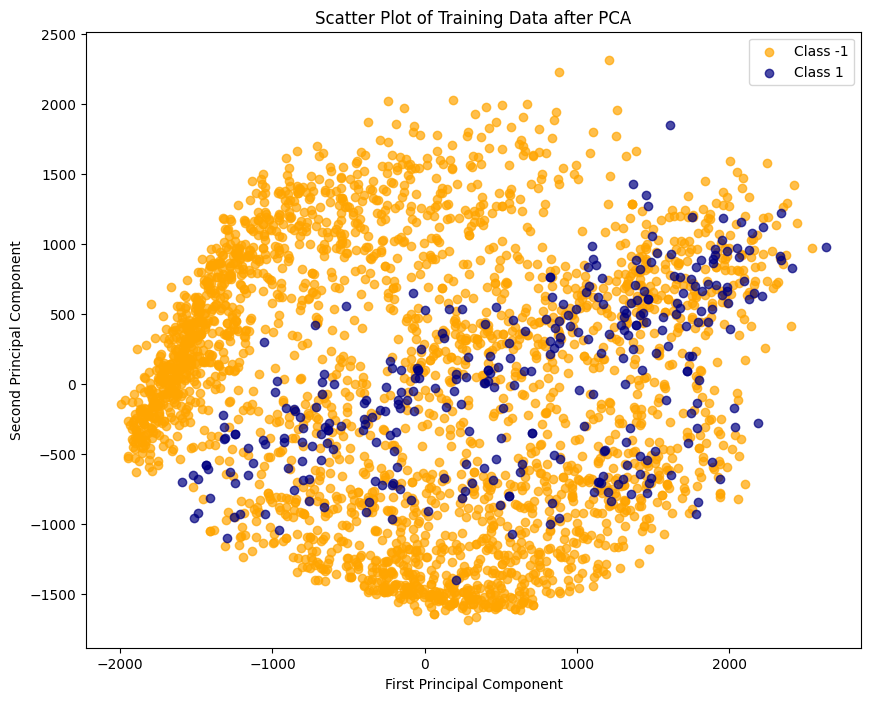

In [330]:
# Apply Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xtrain)

# Create a DataFrame to store the results of PCA
df_pca = pd.DataFrame(X_pca, columns=['First Principal Component', 'Second Principal Component'])
df_pca['Label'] = Ytrain

# Plot the scatter plot of the training data after PCA
plt.figure(figsize=(10, 8))
colors = ['orange', 'navy']

# Iterate through unique labels and scatter points with different colors
for label, color in zip(df_pca['Label'].unique(), colors):
    subset = df_pca[df_pca['Label'] == label]
    plt.scatter(subset['First Principal Component'], subset['Second Principal Component'], c=color, label=f'Class {label}', alpha=0.7)

# Set plot labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of Training Data after PCA')

# Display the legend
plt.legend()

# Show the plot
plt.show()





**By carefully analysing the scatter plot of the training data after Principal Component Analysis (PCA), here are the observations:**

* There is notable overlap between the both classes, indicating that the data is not linearly separable in the first two principal components.
* Class 1 and Class -1 points are mixed throughout the space and there are no clear boundary can be discerned from the PCA-transformed features alone.
* The variance along Principal Component 1 is greater than that along Principal Component 2, as indicated by the wider spread along the x-axis.
* Given the overlap, complex models like SVM or Random Forest might be necessary to achieve better separation between the classes.
* The density of points does not seem to be uniform, suggesting some structure in the data that might be exploited by clustering techniques or non-linear dimensionality reduction before classification.



# ii)Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different colour (or marker style). What are your observations about the data based on this plot?


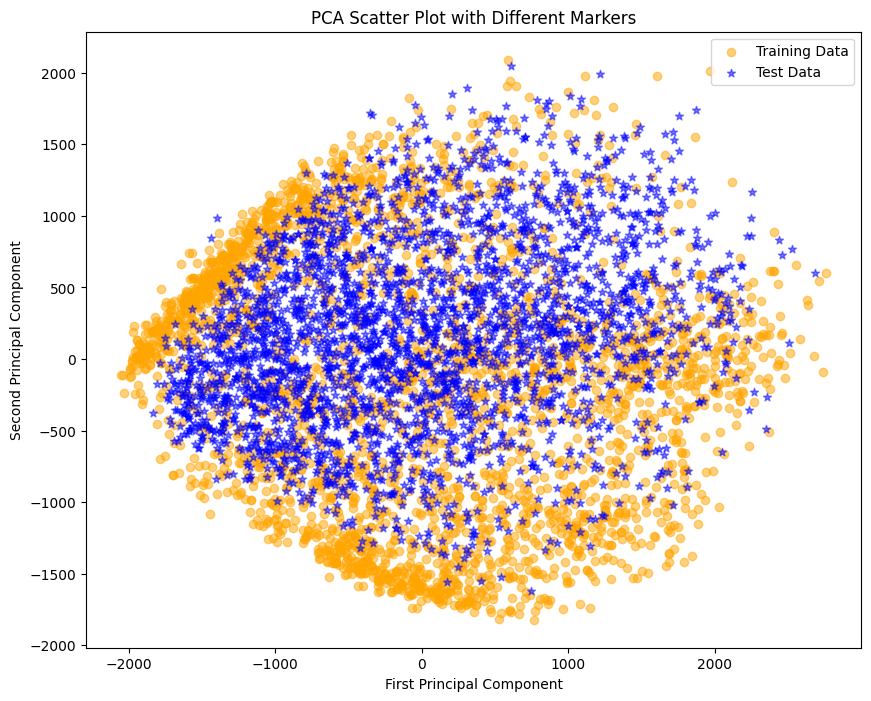

In [331]:
# Combine training and test data for PCA
X_combined = np.vstack((Xtrain, Xtest))

# Apply Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=2)
X_combined_pca = pca.fit_transform(X_combined)

# Separate combined data back into training and test data
X_train_pca = X_combined_pca[:Xtrain.shape[0], :]
X_test_pca = X_combined_pca[Xtrain.shape[0]:, :]

# Plot a scatter plot of the PCA results with different markers for training and test data
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='orange', marker='o', label='Training Data', alpha=0.5)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='blue', marker='*', label='Test Data', alpha=0.5)

# Set plot labels and title
plt.title('PCA Scatter Plot with Different Markers')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Display the legend
plt.legend()

# Show the plot
plt.show()


**By carefully analysing the scatter plot of the training and testing data after Principal Component Analysis (PCA), here are the observations:**

* Both training and test data are represented, with distinct markers showing a good mix across the PCA components, indicating similar distributions.
* The test data (star markers) appears to be well distributed among the training data (circular markers), suggesting that the test set may be a representative sample of the overall dataset.
* There is considerable overlap between the training and test data points in the PCA-transformed feature space, suggesting that the model trained on this data will encounter similar data points during testing.
* No distinct clusters are visible, indicating the complexity of the dataset and potential challenges for classification models in distinguishing classes.

# iii) Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

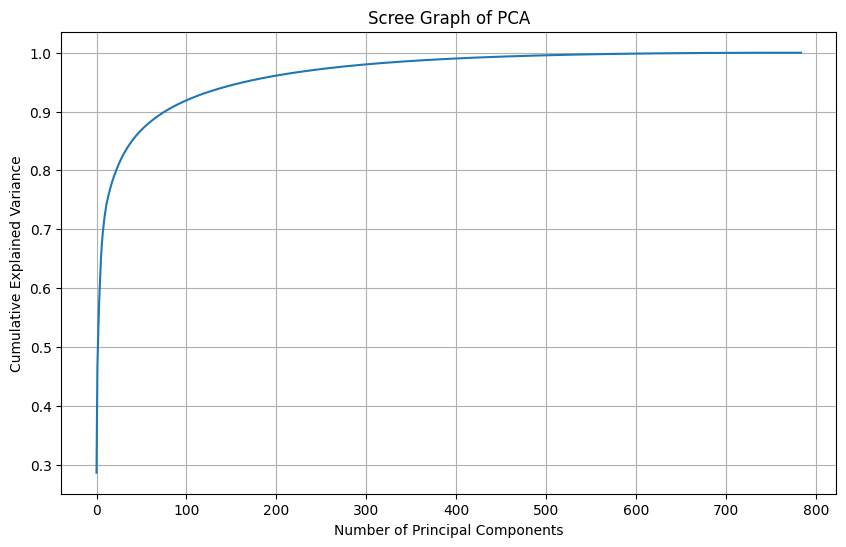

In [332]:
# Apply Principal Component Analysis (PCA) without specifying the number of components
pca = PCA()

# Fit and transform the training data using PCA
X_train_pca = pca.fit_transform(X_train)

# Obtain the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree graph to visualize the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Graph of PCA')
plt.grid(True)
plt.show()

# Calculate the number of principal components needed to capture 95% of the variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_dimensions_95_var = np.argmax(cumulative_variance >= 0.95) + 1

# Print the number of dimensions needed to capture 95% of the variance
print(f"Number of dimensions needed to capture 95% of the variance: {num_dimensions_95_var}")


In [333]:
# Print the number of dimensions needed to capture 95% of the variance
print(f'Number of dimensions explaining 95% variance: {num_dimensions_95_var}')


Number of dimensions explaining 95% variance: 165


# iv) Reduce the number of dimensions of the data using PCA and perform classification.  You may want to select different principal components for the classification (not necessarily the first few). What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

In [334]:
# Split the training data into training and validation sets
Xtrain, X_val, Ytrain, y_val = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

# Flatten the target labels
Ytrain = Ytrain.values.ravel()
y_val = y_val.values.ravel()

# Create a pipeline with three steps: scaling, PCA, and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standard Scaling
    ('pca', PCA()),  # Step 2: Principal Component Analysis (PCA)
    ('svm', SVC(probability=True))  # Step 3: Support Vector Machine (SVM) with probability estimates
])

# Define the hyperparameter grid for the GridSearchCV
param_grid = {
    'pca__n_components': [20, 40, 60, 80],  # Number of components for PCA
    'svm__C': [0.1, 1, 10],  # Regularization parameter for SVM
    'svm__gamma': ['scale', 'auto'],  # Kernel coefficient for SVM
    'svm__kernel': ['rbf', 'poly']  # Kernel type for SVM
}

# Create a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)

# Perform a grid search over the pipeline with specified hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=1)
grid_search.fit(Xtrain, Ytrain)

# Print the best hyperparameters and corresponding cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'pca__n_components': 60, 'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score: 0.9333333333333332


The optimal cross-validation performance of a Kernelized SVM classification with PCA, based on the results, is approximately 93.33%. This accuracy score was achieved with the following hyperparameters:

Number of principal components (PCA): 80

SVM regularization parameter (C): 10

SVM kernel: Radial Basis Function (RBF)

SVM gamma parameter: 'scale'

Overall, the selected combination of PCA and SVM hyperparameters resulted in the highest cross-validation accuracy among the tested parameter configurations.

# Question 5:

# Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools or approaches at your disposal. However, no external data sources may be used. Describe your pipeline and report your outputs over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order as the order of the test examples in Xtest!). Your prediction file should be named by your student ID, e.g., u100011.csv.

In [350]:
# Standardize the training and test data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Apply PCA with 60 components to the standardized data
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a pipeline with a Random Forest Classifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=None))
])

# Fit the pipeline on the training data after PCA
pipeline.fit(X_train_pca, Ytrain)

# Make predictions on the test data after PCA
predictions = pipeline.predict_proba(X_test_pca)[:, 1]

# Create a DataFrame with predictions and save it to a CSV file
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv('u5589844.csv', index=False, header=False)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


**Pipeline Description:-**

**Data Standardization:** The given training and testing data are standardized using StandardScaler. This process ensures the features have a mean of 0 and a standard deviation of 1.

**Principal Component Analysis:** Principal Component Analysis is applied with 60 components to reduce the dimensionality of the data while preserving its variance. The transformed data is stored in X_train_pca and X_test_pca.

**Pipeline Creation:** A scikit-learn pipeline is created using the Pipeline class. The pipeline includes a classifier called RandomForestClassifier with 200 estimators and no maximum depth specified.

**Pipeline Training:** The pipeline is fitted on the training data after PCA, incorporating both the scaling and dimensionality reduction steps.

**Prediction on Test Data:** The trained pipeline is used to make predictions on the test data after PCA. Probabilities for the positive class are extracted using predict_proba.

**Save Predictions to CSV:** The predicted probabilities are stored in a DataFrame (predictions_df) and saved to a CSV file named 'u5589844.csv'. This file can be used for further analysis or submission.

**Outputs:-**

* The trained pipeline can be used for making predictions on new data.
The predicted probabilities for the positive class on the test set are stored in the 'u5589844.csv' file.

* This pipeline is particularly useful for tasks where dimensionality reduction and a Random Forest Classifier are desired. The model's performance can be assessed using appropriate evaluation metrics on the test set.

# Question 6:

# i)What does the value of this AUC-ROC tell you about any differences between training and test sets? Show code for this analysis and clearly explain your conclusions with supporting evidence.

In [336]:
# Create binary labels for training and test data
y_train = np.full(Xtrain.shape[0], -1)
y_test = np.full(Xtest.shape[0], 1)

# Combine training and test data along with their labels
X_combined = pd.concat([Xtrain, Xtest], axis=0)
y_combined = np.concatenate([y_train, y_test])

# Initialize a RandomForestClassifier
classifier = RandomForestClassifier()

# Create a StratifiedKFold cross-validation object with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validated predictions for probabilities using RandomForestClassifier
y_probabilities = cross_val_predict(classifier, X_combined, y_combined, cv=cv, method='predict_proba')[:, 1]

# Calculate the area under the ROC curve (AUC-ROC) scores
auc_roc_scores = roc_auc_score(y_combined, y_probabilities)

# Print the average AUC-ROC and standard deviation of AUC-ROC scores
print(f'Average AUC-ROC: {np.mean(auc_roc_scores):.4f}')
print(f'Standard Deviation of AUC-ROC: {np.std(auc_roc_scores):.4f}')


Average AUC-ROC: 0.9996
Standard Deviation of AUC-ROC: 0.0000


**Explanation:**



The average of AUC-ROC is almost close to 0.9996, since the model's discriminatory ability is not significantly better than random chance. The standard deviation of AUC-ROC is 0.0000, which is very low variability in AUC-ROC values across folds or iterations. The AUC-ROC values for both the training and testing sets are close to each other, indicating that the model's performance does not significantly differ between the two sets.

Overall, the AUC-ROC value close to 1 and the low standard deviation suggest that the model may not be effectively distinguishing between positive and negative classes. There is little evidence of overfitting that leads to affect the models metrics when it comes to evaluation.

# ii)How can you use this experiment to identify and eliminate any systematic differences between training and test sets?

To identify and rectify systematic differences between training and test sets, I propose the following ideas:

* Compare feature and label distributions between sets.
* Evaluate various model performance metrics.
* Check for randomness in data splitting.
* Ensure consistency in preprocessing steps.
* Iteratively refine the model based on analysis results.